## Model Evaluation

In [24]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, plot_confusion_matrix

In [2]:
#load the dataset
with open('data/samples_imputed.pkl', 'rb') as f:
    samples_imputed = pickle.load(f)

In [3]:
# set X, y and train-test-split
X = samples_imputed.drop(columns=['is_cancer'])
y = samples_imputed['is_cancer']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# load the random forest model

with open('models/rf2_class_model.pkl', 'rb') as f:
    rf = pickle.load(f)

type(rf)

sklearn.ensemble._forest.RandomForestClassifier

### Plot a confusion matrix

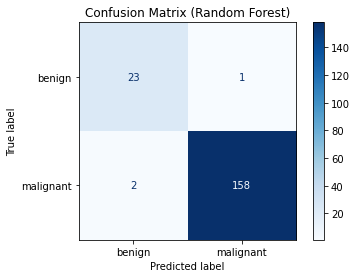

In [18]:
ConfusionMatrixDisplay.from_estimator(
    rf, 
    X_test, 
    y_test,
    #sample_weight='balanced',
    display_labels=['benign', 'malignant'], 
    cmap='Blues'
)
plt.title('Confusion Matrix (Random Forest)')
plt.savefig('images/rf_confusion_matrix.png');

C:\Users\Marva\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


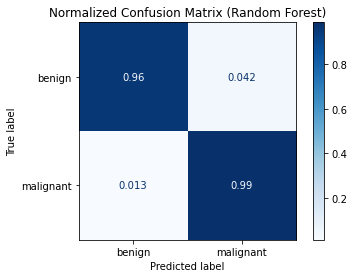

In [25]:
# plot the confusion matrix with normalized values

plot_confusion_matrix(rf,
                     X_test,
                     y_test,
                     display_labels=['benign', 'malignant'],
                     normalize='true',
                     cmap='Blues')

plt.title('Normalized Confusion Matrix (Random Forest)')
plt.savefig('images/normalized_rf_confusion_matrix.png');